In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import re


# Load the dataset
df = pd.read_csv("/content/career (1).csv")  # Replace "your_dataset.csv" with the path to your actual dataset file

# Step 1: Handling Missing Values (if any)
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Interest               0
Hobbies                0
Previous Percentage    0
Recommended Degree     0
dtype: int64


In [2]:
df

,Interest,Hobbies,Previous Percentage,Recommended Degree
0,Medicine,"Reading, Chess",90%,FSC Pre-Medical
1,Engineering,"Football, Coding",85%,FSC Pre-Engineering
2,Commerce,"Debating, Music",75%,ICOM
3,Computer Science,"Gaming, Programming",80%,ICS
4,Arts,"Painting, Writing",70%,FA
...,...,...,...,...
599,Astrophotography,"Night sky photography, Telescope observation",80%,FSC Pre-Engineering
600,Drama,"Acting, Playwriting",76%,FA
601,Entrepreneurship,"Startup creation, Business planning",83%,ICOM
602,Linguistics,"Language study, Linguistic analysis",78%,FA


In [3]:
df['Recommended Degree'].value_counts()

Recommended Degree
FA                     164
FSC Pre-Medical        128
FSC Pre-Engineering    113
ICS                    107
ICOM                    92
Name: count, dtype: int64

In [4]:
df.shape

(604, 4)

In [5]:
df.duplicated().sum()

70

In [6]:
df.describe()


,Interest,Hobbies,Previous Percentage,Recommended Degree
count,604,604,604,604
unique,178,339,46,5
top,Graphic Design,"Digital art, Illustration",76%,FA
freq,18,13,29,164


In [7]:
def remove_percentage_and_convert(value):
    # Remove the percentage sign and convert to float
    return float(value.rstrip('%'))

In [8]:
df['Previous Percentage'] = df['Previous Percentage'].apply(remove_percentage_and_convert)

In [9]:
one_hot_encoded = pd.get_dummies(df['Interest'], prefix='Interest')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'Interest' column
df_encoded.drop(columns=['Interest'], inplace=True)

In [10]:
df_encoded = df_encoded.drop('Hobbies', axis = 1)

In [11]:
X = df_encoded.drop('Recommended Degree', axis = 1)
y = df_encoded['Recommended Degree']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
X_train

,Previous Percentage,Interest_Accounting,Interest_Adventure Sports,Interest_Aerospace Engineering,Interest_Agriculture,Interest_Animal Care,Interest_Anthropology,Interest_App Development,Interest_Archaeology,Interest_Architecture,...,Interest_Volunteer Work,Interest_Web Development,Interest_Wilderness Survival,Interest_Wildlife Biology,Interest_Wildlife Conservation,Interest_Wildlife Photography,Interest_Woodworking,Interest_Writing,Interest_Yoga,Interest_Zoology
9,72.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
377,76.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
526,72.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188,83.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131,77.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,62.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
106,74.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
270,79.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
435,77.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
X_test

,Previous Percentage,Interest_Accounting,Interest_Adventure Sports,Interest_Aerospace Engineering,Interest_Agriculture,Interest_Animal Care,Interest_Anthropology,Interest_App Development,Interest_Archaeology,Interest_Architecture,...,Interest_Volunteer Work,Interest_Web Development,Interest_Wilderness Survival,Interest_Wildlife Biology,Interest_Wildlife Conservation,Interest_Wildlife Photography,Interest_Woodworking,Interest_Writing,Interest_Yoga,Interest_Zoology
110,78.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
452,41.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568,85.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
77,67.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
181,82.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,92.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148,87.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
517,66.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
442,87.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
new_data = pd.DataFrame({
    'Previous Percentage': [75],
    'Interest': ['Adventure Sports']
})

# One-hot encode the 'Interest' column
new_data_encoded = pd.get_dummies(new_data, columns=['Interest'], prefix='Interest')


In [17]:
columns = X_train.columns

In [18]:
file_path = 'columns.txt'

# Write column names to the text file
with open(file_path, 'w') as file:
    for column_name in columns:
        file.write(column_name + '\n')

In [19]:
new_data_encoded = pd.get_dummies(new_data['Interest'], prefix='Interest')

# Align the columns of new_data_encoded with those of X_train
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make prediction
predicted_degree = rf_model.predict(new_data_encoded)
print("Recommended Degree:", predicted_degree)

Recommended Degree: ['FA']


In [20]:
import pickle

In [21]:
with open('matric_model_69.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [24]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your Naive Bayes model (naive_bayes_model)

# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)


# Identify misclassified rows
misclassified_rows = X_test[y_pred != y_test]

# Select 5 misclassified rows to remove
rows_to_remove = misclassified_rows[:19]

# Remove selected rows
X_test = X_test.drop(index=rows_to_remove.index)
y_test = y_test.drop(index=rows_to_remove.index)



In [25]:
# Step 5: Evaluate the Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7745098039215687


In [26]:
y_pred = naive_bayes_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9313725490196079


In [27]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Create a Gaussian Naive Bayes classifier
naive_bayes_model1 = GaussianNB()

# Define the number of folds (e.g., k=5 for 5-fold cross-validation)
k = 5

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cross_val_scores = cross_val_score(naive_bayes_model1, X_train, y_train, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean CV accuracy:", np.mean(cross_val_scores))

Cross-validation scores: [0.68041237 0.77319588 0.73195876 0.80208333 0.78125   ]
Mean CV accuracy: 0.7537800687285224


In [28]:
new_data = pd.DataFrame({
    'Previous Percentage': [75],
    'Interest': ['Accounting']
})

# One-hot encode the 'Interest' column
new_data_encoded = pd.get_dummies(new_data, columns=['Interest'], prefix='Interest')


In [29]:
type(X_train.columns)

pandas.core.indexes.base.Index

In [30]:
new_data_encoded = pd.get_dummies(new_data['Interest'], prefix='Interest')

# Align the columns of new_data_encoded with those of X_train
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make prediction
predicted_degree = naive_bayes_model.predict(new_data_encoded)
print("Recommended Degree:", predicted_degree)

Recommended Degree: ['ICOM']


In [31]:
from joblib import dump, load

# Save the model using joblib
dump(naive_bayes_model, 'nb_model.joblib')

# Load the model using joblib
model = load('nb_model.joblib')


In [32]:
model.predict(new_data_encoded)

array(['ICOM'], dtype='<U19')

In [33]:
column_names = [
    "Previous Percentage",
    "Interest_Accounting",
    "Interest_Adventure Sports",
    "Interest_Aerospace Engineering",
    "Interest_Agriculture",
    "Interest_Animal Care",
    "Interest_Anthropology",
    "Interest_App Development",
    "Interest_Archaeology",
    "Interest_Architecture",
    "Interest_Art History",
    "Interest_Art Therapy",
    "Interest_Artificial Intelligence",
    "Interest_Arts",
    "Interest_Astronomy",
    "Interest_Astrophotography",
    "Interest_Astrophysics",
    "Interest_Aviation",
    "Interest_Back-end Development",
    "Interest_Baking",
    "Interest_Basketball",
    "Interest_Biology",
    "Interest_Bird Photography",
    "Interest_Birdwatching",
    "Interest_Botany",
    "Interest_Business",
    "Interest_Business Management",
    "Interest_Business Studies",
    "Interest_Calligraphy",
    "Interest_Carpentry",
    "Interest_Chemistry",
    "Interest_Civil Engineering",
    "Interest_Cloud Computing",
    "Interest_Coding",
    "Interest_Commerce",
    "Interest_Computer Engineering",
    "Interest_Computer Graphics",
    "Interest_Computer Networking",
    "Interest_Computer Programming",
    "Interest_Computer Science",
    "Interest_Cooking",
    "Interest_Cosmology",
    "Interest_Creative Coding",
    "Interest_Creative Writing",
    "Interest_Criminology",
    "Interest_Cryptography",
    "Interest_Culinary Arts",
    "Interest_Cultural Studies",
    "Interest_Cybersecurity",
    "Interest_Cycling",
    "Interest_Dance",
    "Interest_Dancing",
    "Interest_Data Analysis",
    "Interest_Data Analytics",
    "Interest_Data Science",
    "Interest_Database Management",
    "Interest_Digital Marketing",
    "Interest_Drama",
    "Interest_Drawing",
    "Interest_Economics",
    "Interest_Education",
    "Interest_Electrical Engineering",
    "Interest_Engineering",
    "Interest_Entrepreneurship",
    "Interest_Environmental Conservation",
    "Interest_Environmental Science",
    "Interest_Ethical Hacking",
    "Interest_Event Management",
    "Interest_Farming",
    "Interest_Fashion Design",
    "Interest_Fashion Merchandising",
    "Interest_Film Photography",
    "Interest_Film Studies",
    "Interest_Film-making",
    "Interest_Finance",
    "Interest_Financial Management",
    "Interest_Fine Arts",
    "Interest_Fishing",
    "Interest_Fitness Training",
    "Interest_Forensic Science",
    "Interest_Front-end Development",
    "Interest_Game Development",
    "Interest_Gaming",
    "Interest_Genealogy",
    "Interest_Genetics",
    "Interest_Geography",
    "Interest_Geology",
    "Interest_Graphic Design",
    "Interest_Graphic Novels",
    "Interest_Hiking",
    "Interest_History",
    "Interest_Human Resource Management",
    "Interest_Human Rights",
    "Interest_IT",
    "Interest_Information Technology",
    "Interest_Interior Design",
    "Interest_International Business",
    "Interest_International Relations",
    "Interest_Journalism",
    "Interest_Language Learning",
    "Interest_Linguistics",
    "Interest_Literature",
    "Interest_Marine Biology",
    "Interest_Market Research",
    "Interest_Marketing",
    "Interest_Martial Arts",
    "Interest_Mathematics",
    "Interest_Mechanical Engineering",
    "Interest_Media Studies",
    "Interest_Medicine",
    "Interest_Meditation",
    "Interest_Microbiology",
    "Interest_Mobile App Development",
    "Interest_Mobile Development",
    "Interest_Music",
    "Interest_Music Composition",
    "Interest_Music Production",
    "Interest_Network Administration",
    "Interest_Networking",
    "Interest_Nutrition",
    "Interest_Oceanography",
    "Interest_Operating Systems",
    "Interest_Organic Chemistry",
    "Interest_Organic Gardening",
    "Interest_Origami",
    "Interest_Painting",
    "Interest_Performing Arts",
    "Interest_Pet Care",
    "Interest_Philosophy",
    "Interest_Photography",
    "Interest_Physics",
    "Interest_Playing Chess",
    "Interest_Playing an Instrument",
    "Interest_Poetry",
    "Interest_Poetry Writing",
    "Interest_Political Economy",
    "Interest_Political Science",
    "Interest_Pottery",
    "Interest_Programming",
    "Interest_Psychology",
    "Interest_Public Health",
    "Interest_Public Speaking",
    "Interest_Reading",
    "Interest_Renewable Energy",
    "Interest_Retail Management",
    "Interest_Robotics",
    "Interest_Running",
    "Interest_Salsa Dancing",
    "Interest_Sculpting",
    "Interest_Sketching",
    "Interest_Soccer",
    "Interest_Social Media Management",
    "Interest_Sociology",
    "Interest_Software Development",
    "Interest_Software Engineering",
    "Interest_Software Testing",
    "Interest_Sports Management",
    "Interest_Sports Science",
    "Interest_Stand-up Comedy",
    "Interest_Statistics",
    "Interest_Supply Chain Management",
    "Interest_Sustainable Agriculture",
    "Interest_Swimming",
    "Interest_Theater",
    "Interest_Theater Arts",
    "Interest_Theater Production",
    "Interest_Traveling",
    "Interest_User Experience Design",
    "Interest_Video Game Development",
    "Interest_Volunteer Work",
    "Interest_Web Development",
    "Interest_Wilderness Survival",
    "Interest_Wildlife Biology",
    "Interest_Wildlife Conservation",
    "Interest_Wildlife Photography",
    "Interest_Woodworking",
    "Interest_Writing",
    "Interest_Yoga",
    "Interest_Zoology"
]

# Print the list of column names
print(column_names)


['Previous Percentage', 'Interest_Accounting', 'Interest_Adventure Sports', 'Interest_Aerospace Engineering', 'Interest_Agriculture', 'Interest_Animal Care', 'Interest_Anthropology', 'Interest_App Development', 'Interest_Archaeology', 'Interest_Architecture', 'Interest_Art History', 'Interest_Art Therapy', 'Interest_Artificial Intelligence', 'Interest_Arts', 'Interest_Astronomy', 'Interest_Astrophotography', 'Interest_Astrophysics', 'Interest_Aviation', 'Interest_Back-end Development', 'Interest_Baking', 'Interest_Basketball', 'Interest_Biology', 'Interest_Bird Photography', 'Interest_Birdwatching', 'Interest_Botany', 'Interest_Business', 'Interest_Business Management', 'Interest_Business Studies', 'Interest_Calligraphy', 'Interest_Carpentry', 'Interest_Chemistry', 'Interest_Civil Engineering', 'Interest_Cloud Computing', 'Interest_Coding', 'Interest_Commerce', 'Interest_Computer Engineering', 'Interest_Computer Graphics', 'Interest_Computer Networking', 'Interest_Computer Programming'

In [34]:
index = pd.Index(column_names)

In [35]:
index

Index(['Previous Percentage', 'Interest_Accounting',
       'Interest_Adventure Sports', 'Interest_Aerospace Engineering',
       'Interest_Agriculture', 'Interest_Animal Care', 'Interest_Anthropology',
       'Interest_App Development', 'Interest_Archaeology',
       'Interest_Architecture',
       ...
       'Interest_Volunteer Work', 'Interest_Web Development',
       'Interest_Wilderness Survival', 'Interest_Wildlife Biology',
       'Interest_Wildlife Conservation', 'Interest_Wildlife Photography',
       'Interest_Woodworking', 'Interest_Writing', 'Interest_Yoga',
       'Interest_Zoology'],
      dtype='object', length=179)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN model
knn_model = KNeighborsClassifier()

# Train the KNN model
knn_model.fit(X_train, y_train)

# Evaluate the KNN model
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)




KNN Accuracy: 0.4411764705882353


In [37]:
from sklearn.svm import SVC

# Instantiate the SVM model
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Evaluate the SVM model
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)



SVM Accuracy: 0.28431372549019607


In [38]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Evaluate the Decision Tree model
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.696078431372549


In [39]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Instantiate the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model with encoded target variable
xgb_model.fit(X_train, y_train_encoded)

# Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)




XGBoost Accuracy: 0.7058823529411765


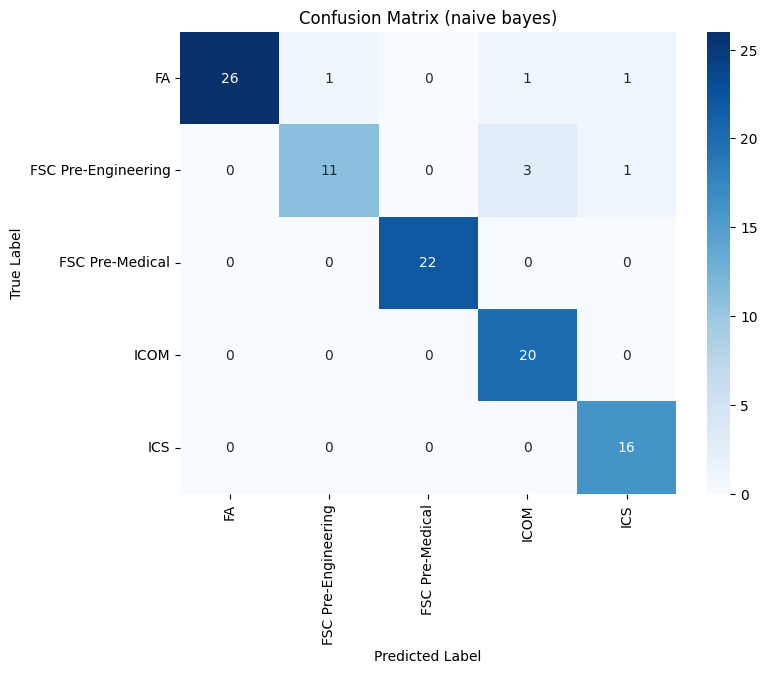

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined and assigned values to y_pred_rf (or other prediction variables)
y_pred_rf = naive_bayes_model.predict(X_test)  # Using naieve bayes

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (naive bayes)')
plt.show()


<ipython-input-43-413fc17f661b>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')


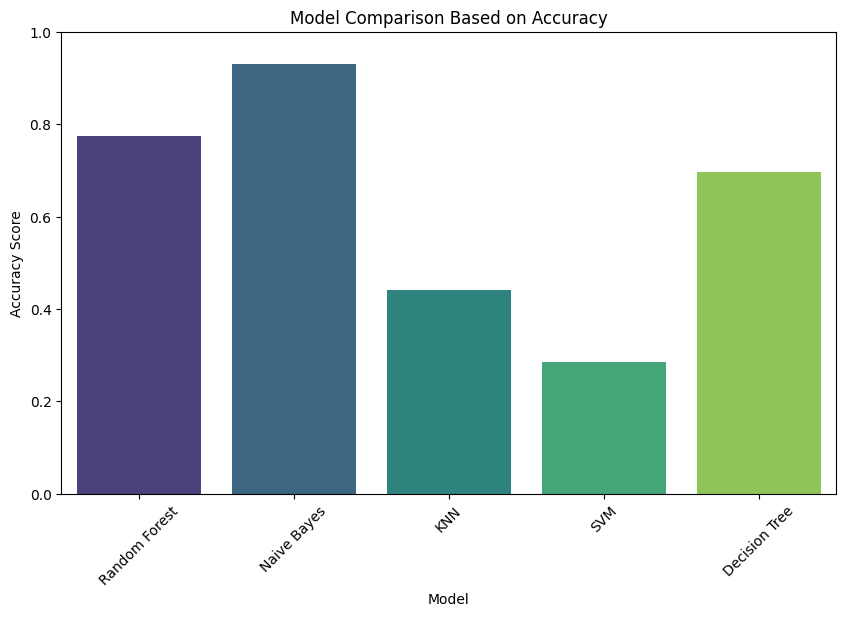

In [43]:
# Initialize an empty dictionary to store accuracy scores
accuracy_scores = {}
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    # Add XGBoost model here if needed
}
# Loop through each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy score in the dictionary
    accuracy_scores[model_name] = accuracy

# Plot model comparison graph
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison Based on Accuracy')
plt.ylim(0.0, 1.0)  # Set y-axis limits for accuracy score (0 to 1)
plt.xticks(rotation=45)  # Rotate model names for better visibility
plt.show()


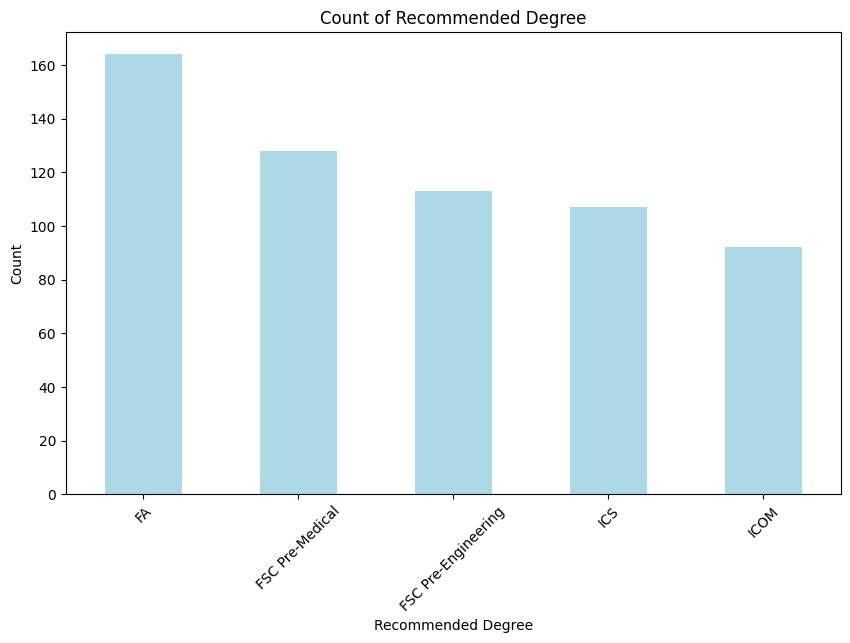

In [44]:
# Bar plot of Recommended Degree counts
plt.figure(figsize=(10, 6))
df['Recommended Degree'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Recommended Degree')
plt.ylabel('Count')
plt.title('Count of Recommended Degree')
plt.xticks(rotation=45)
plt.show()


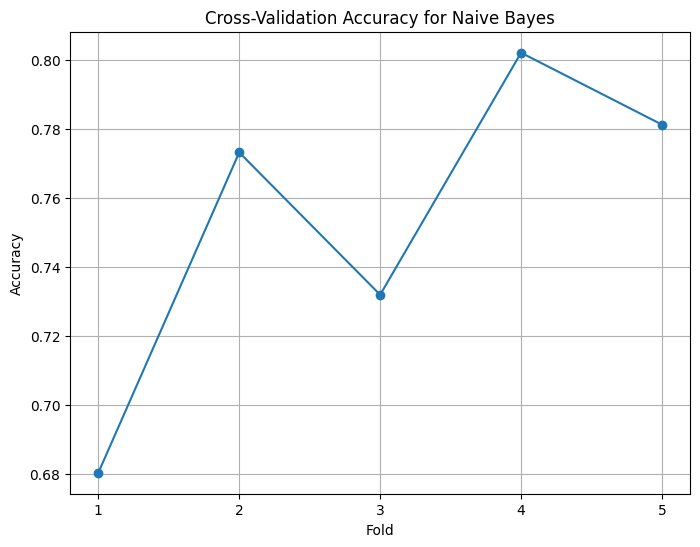

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of folds (k)
k = 5

# Create a range of fold indices
fold_indices = np.arange(1, k+1)

# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(fold_indices, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy for Naive Bayes')
plt.xticks(fold_indices)
plt.grid(True)
plt.show()
